In [96]:
#Importing Relevant libraries and importing data from CSV

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


historicalEmissions = pd.read_csv('/Users/jamiehoughton/JamiesProjects/historical_emissions.csv')



I want to see a summary of the data I have just imported.

In [97]:

print(historicalEmissions.head())

   ISO         Country    Data source                Sector      Gas    Unit  \
0  RUS          Russia  Climate Watch  Total including LUCF  All GHG  MtCO₂e   
1  DEU         Germany  Climate Watch  Total including LUCF  All GHG  MtCO₂e   
2  TUR         Türkiye  Climate Watch  Total including LUCF  All GHG  MtCO₂e   
3  GBR  United Kingdom  Climate Watch  Total including LUCF  All GHG  MtCO₂e   
4  ITA           Italy  Climate Watch  Total including LUCF  All GHG  MtCO₂e   

      2020     2019     2018     2017  ...     1999     1998     1997  \
0  1799.98  1889.93  1843.24  1750.27  ...  1742.90  1712.17  1709.36   
1   681.18   740.08   791.00   819.67  ...   933.74   971.83   994.71   
2   476.34   462.83   474.88   474.47  ...   242.20   242.32   241.10   
3   411.12   452.15   468.34   476.57  ...   699.68   723.42   725.57   
4   339.21   377.08   386.15   391.20  ...   477.20   469.67   458.26   

      1996     1995     1994     1993     1992     1991     1990  
0  1858.96  1

I want to see how the total greenhouse gas emissions have changed over the past 30 years for the top 6 largest nations in the Europe and Central Asia dataset.

I need to reverse the data in the data frame as it currently is displaying 2020-1990 as oppose to 1990-2020.

/Users/jamiehoughton/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/jamiehoughton/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/jamiehoughton/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


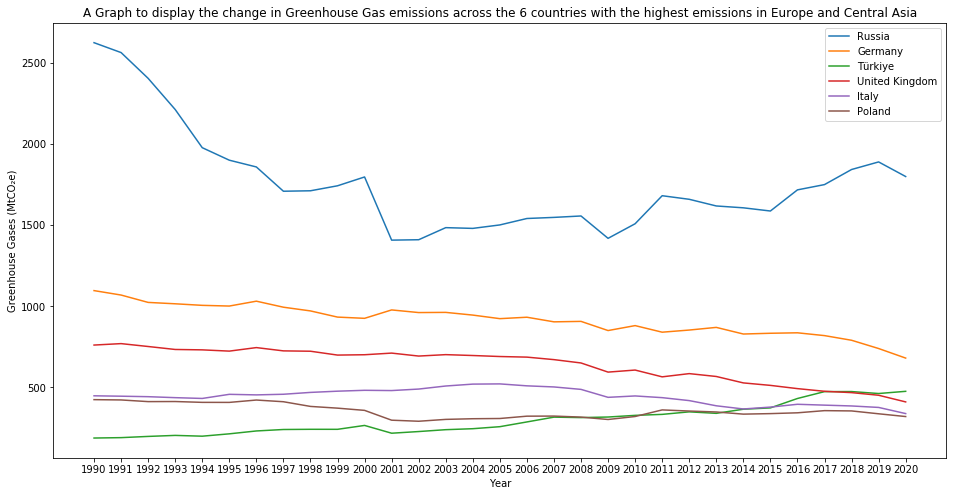

In [98]:
historicalEmissionsReverse = historicalEmissions.iloc[:, ::-1] #Switching the data round

plt.figure(figsize=(16,8))


for i in range(len(historicalEmissionsReverse)):
    plt.plot(historicalEmissionsReverse.columns[:31],historicalEmissionsReverse.iloc[i, :31], label=historicalEmissionsReverse.iloc[i, -2])
    #Iterating over the dataframe and plotting the data from 1990 to 2020
    if i > 4: 
        break # when i gets to 5
   

plt.title("A Graph to display the change in Greenhouse Gas emissions across the 6 countries with the highest emissions in Europe and Central Asia")
plt.xlabel("Year")
plt.ylabel("Greenhouse Gases (MtCO₂e)")
plt.legend()
plt.show()

# show the graph


I want to visualise the total area of Greenhouse gases, combined with a breakdown of each countries contribution to this. The easiest way to do this is with a stacked area graph. I need to extract just the data for the 6 countries' greenhouse gas emissions. As the data is stored under columns of 1990-2020 and in rows of countries, I need to transpose this. This is so I can user the pd.plot.area() function. 

<Figure size 1152x576 with 0 Axes>

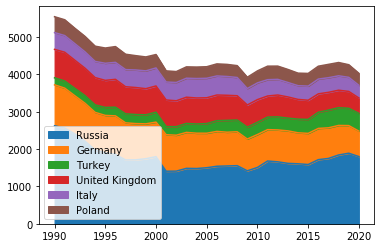

In [99]:
stackedPlotData = historicalEmissionsReverse.iloc[0:6, :31]

stackedPlotData_Transposed = stackedPlotData.T



stackedPlotData_Transposed.columns = ['Russia','Germany','Turkey','United Kingdom','Italy', 'Poland']

plt.figure(figsize=(16,8))

stackedPlotData_Transposed.plot.area()
